# Using the xtractomatic routines

The `xtractomatic` package is used to subset data from a remote servers.

It can be used with a `lon`, `lat`, `time` track (like a drifter trajectory),
3D bounding box, or within a polygon.

https://cran.r-project.org/web/packages/xtractomatic/vignettes/Usingxtractomatic.html

In [1]:
library("xtractomatic")

str(Marlintag38606)

'data.frame':	152 obs. of  7 variables:
 $ date  : Date, format: "2003-04-23" "2003-04-24" ...
 $ lon   : num  204 204 204 204 204 ...
 $ lat   : num  19.7 19.8 20.4 20.3 20.3 ...
 $ lowLon: num  204 204 204 204 204 ...
 $ higLon: num  204 204 204 204 204 ...
 $ lowLat: num  19.7 18.8 18.8 18.9 18.9 ...
 $ higLat: num  19.7 20.9 21.9 21.7 21.7 ...


In [2]:
tagData <- Marlintag38606
xpos <- tagData$lon
ypos <- tagData$lat
tpos <- tagData$date
swchl <- xtracto(xpos, ypos, tpos, "swchla8day", xlen = .2, ylen = .2)

In [3]:
str(swchl)

'data.frame':	152 obs. of  11 variables:
 $ mean             : num  0.073 NaN 0.074 0.0653 0.0403 ...
 $ stdev            : num  NA NA 0.00709 0.00768 0.02278 ...
 $ n                : int  1 0 16 4 7 9 4 3 0 6 ...
 $ satellite date   : chr  "2003-04-19T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" ...
 $ requested lon min: num  204 204 204 204 204 ...
 $ requested lon max: num  204 204 204 204 204 ...
 $ requested lat min: num  19.6 19.7 20.3 20.2 20.2 ...
 $ requested lat max: num  19.8 19.9 20.5 20.4 20.4 ...
 $ requested date   : num  12165 12166 12172 12173 12174 ...
 $ median           : num  0.073 NA 0.073 0.0645 0.031 ...
 $ mad              : num  0 NA 0.00297 0.00741 0.0089 ...


First combine the two data frames (the input and the output) into one, 
so it will be easy to take into account the locations that didn't 
retrieve a value.


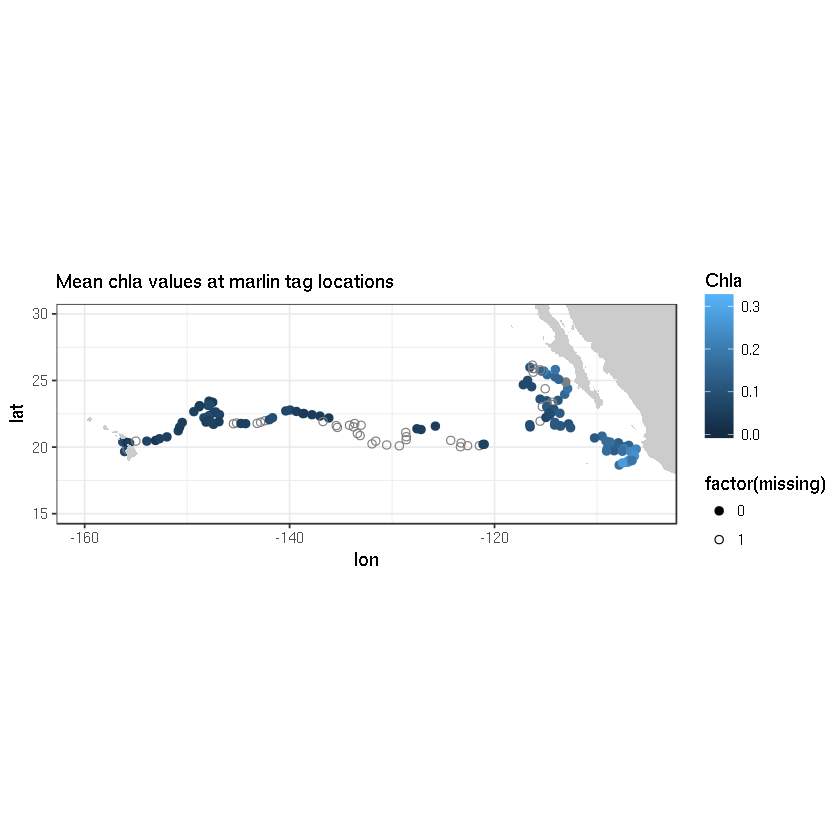

In [4]:
library("ggplot2")
library("maps")
library("mapdata")

alldata <- cbind(tagData, swchl)

# Adjust the longitudes to be (-180, 180).
alldata$lon <- alldata$lon - 360

# Create a variable that shows if chla is missing.
alldata$missing <- is.na(alldata$mean) * 1

# Set limits of the map.
ylim <- c(15, 30)
xlim <- c(-160, -105)

# Get outline data for map.
w <- map_data("worldHires", ylim = ylim, xlim = xlim)

# Plot using ggplot.
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = mean,shape = factor(missing)), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient(limits = c(0., 0.32), "Chla") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle("Mean chla values at marlin tag locations")

Comparing with the median

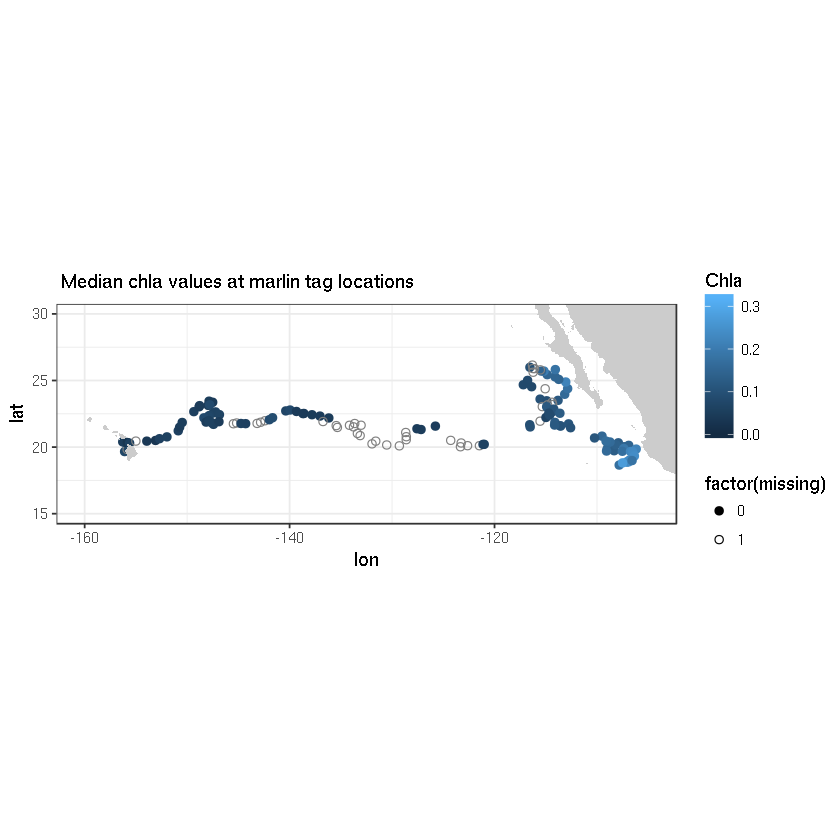

In [5]:
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = median, shape = factor(missing)), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient(limits = c(0., 0.32), "Chla") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle(" Median chla values at marlin tag locations")

Topography data

In [6]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
topo <- xtracto(tagData$lon, tagData$lat, tagData$date, "ETOPO360", .1, .1)

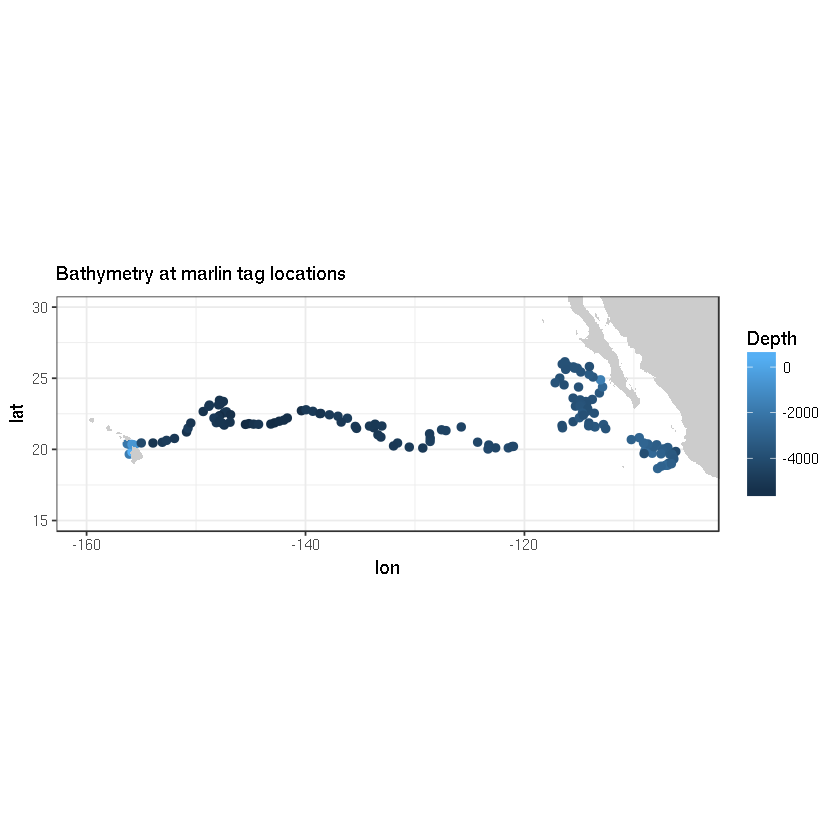

In [7]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
alldata <- cbind(tagData, topo)
alldata$lon <- alldata$lon - 360
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = mean), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient("Depth") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle("Bathymetry at marlin tag locations")